<a href="https://colab.research.google.com/github/sudhanthiran/Python_Code_iNeuron/blob/Python-Assignments/Linear_Regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
y=boston.target
bos['Price']=y

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.shape

(506, 14)

In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df=bos.copy()

In [9]:
df.replace(0, np.nan, inplace=True)

In [10]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
Price      0.000000
dtype: float64

In [12]:
df = df.drop('ZN', axis=1)
df = df.drop('CHAS', axis=1)

In [13]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
corr = bos.corr()
corr_df = df.corr()

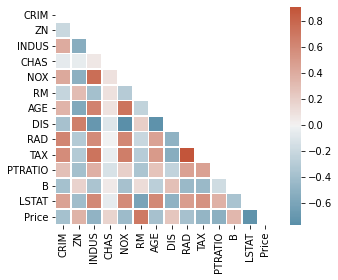

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask=mask, center=0, square=True, linewidths=.5)#,vmax=.3, cbar_kws={"shrink": .5})

In [16]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

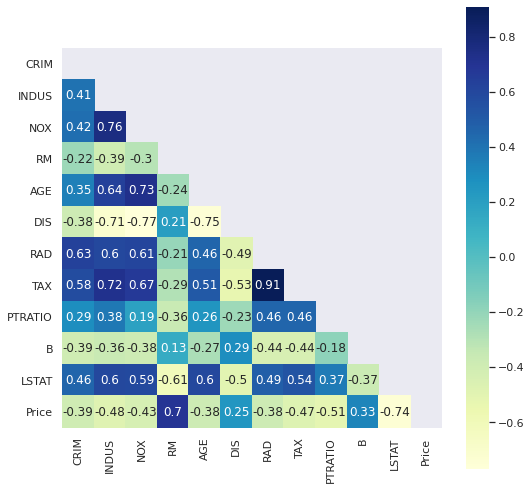

In [17]:
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(corr_df.round(2), square=True, cmap='YlGnBu', annot=True, mask=mask)

In [18]:
#sns.pairplot(bos,x_vars=bos.columns,y_vars=y)

In [19]:
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS']
df = df.drop(columns=columns)

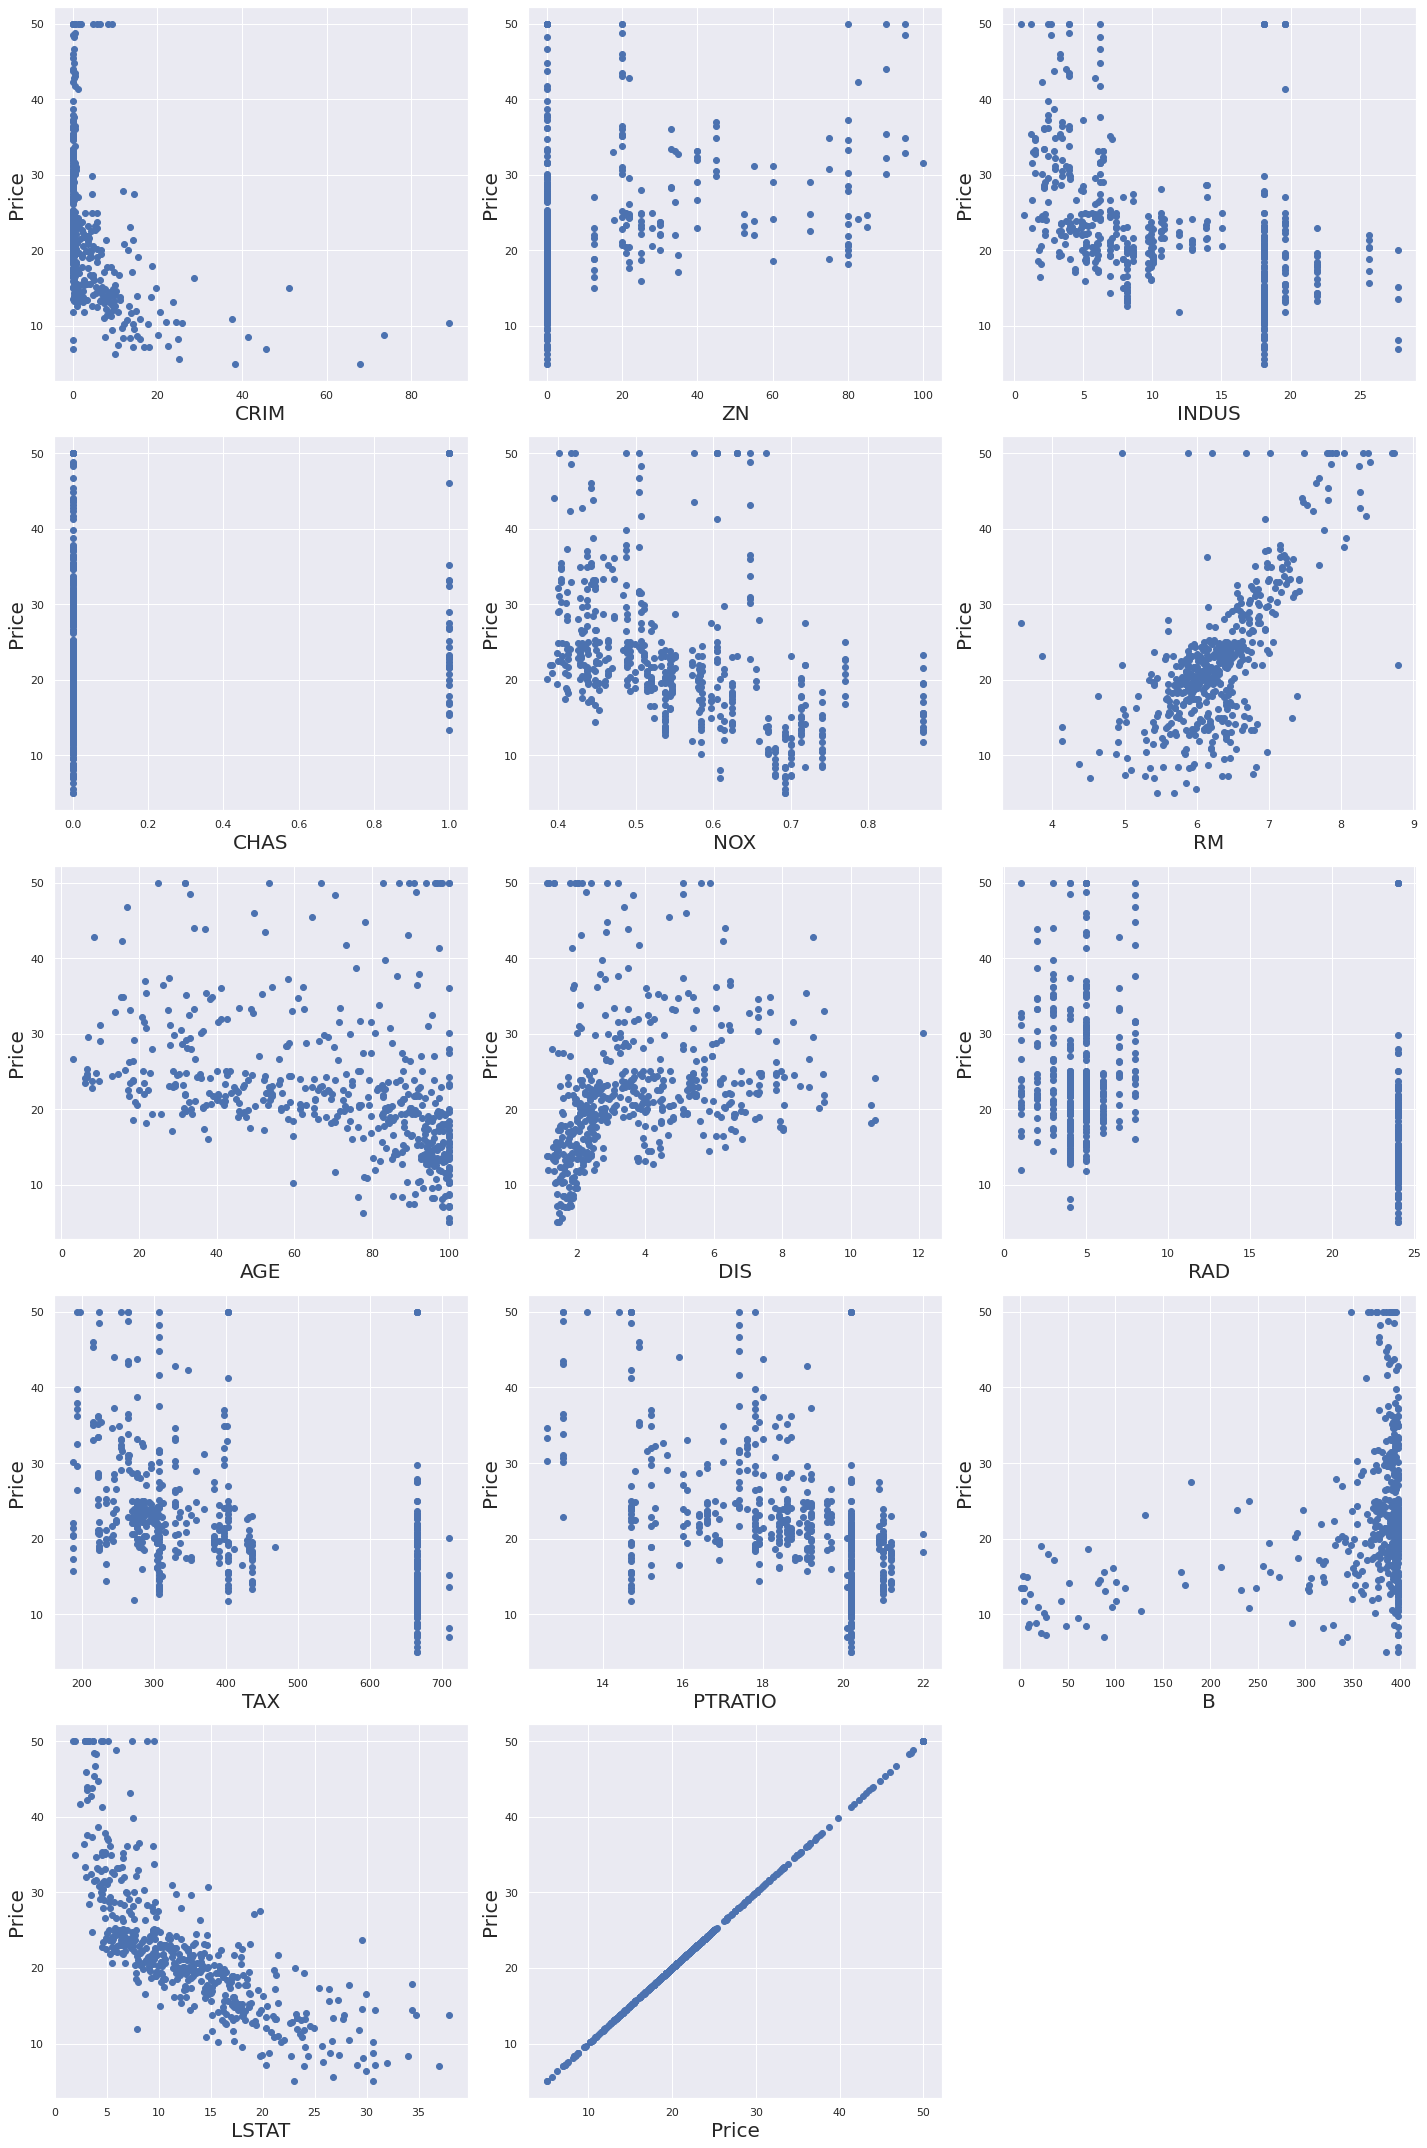

In [20]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(bos[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

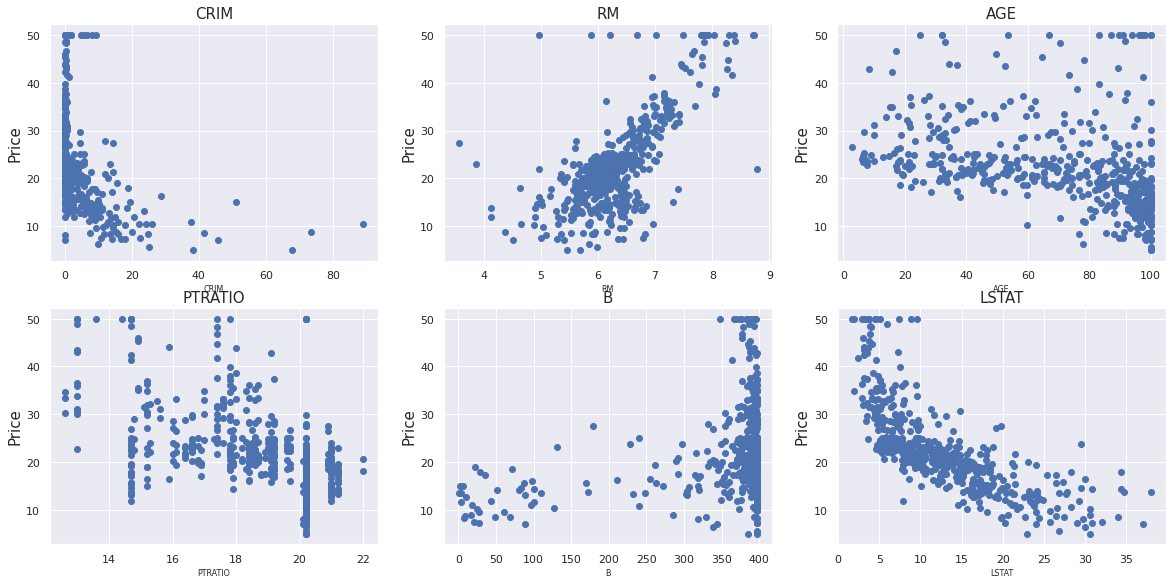

In [21]:
features = df.drop('Price', 1).columns
target = df['Price']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('Price', fontsize=15)

# Fitting the Data as it is

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(bos, y, test_size = 0.2, random_state=5)

In [23]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

In [25]:
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

Root Mean Squared Error: 8.188284021111442e-14
R^2: 1.0


# Fitting the modified Data

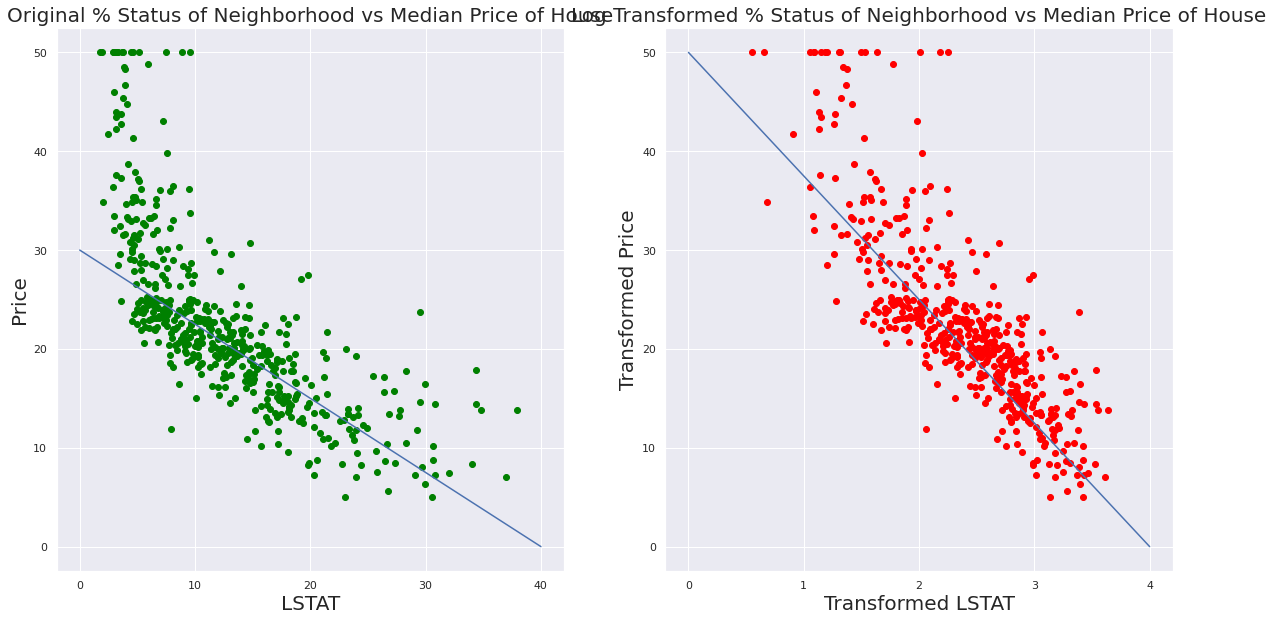

In [26]:
df["LOGLSTAT"] = df["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(df["LSTAT"], df['Price'], color='green')
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.plot([0,40],[30,0])

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(df["LOGLSTAT"], df['Price'], color='red')
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed Price',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()

In [27]:
X = df[['LOGLSTAT', 'RM']]
Y = df.Price

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.33, random_state = 10)

In [29]:
lrm = LinearRegression()
lrm.fit(X_train1, y_train1)
y_predicted = lrm.predict(X_test1)

In [30]:
rmse_lrm = (np.sqrt(mean_squared_error(y_test1, y_predicted)))
r2_lrm = r2_score(y_test1, y_predicted)

In [31]:
print("Root Mean Squared Error: {}".format(rmse_lrm))
print("R^2: {}".format(r2_lrm))

Root Mean Squared Error: 5.214330262011093
R^2: 0.7155988559379332


# Actual vs Predicted price plot

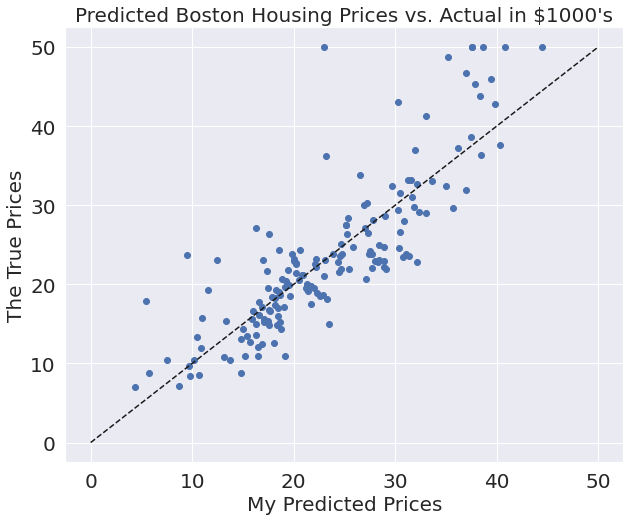

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(y_predicted, y_test1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20);


plt.xlabel('My Predicted Prices', fontsize=20);
plt.title("Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()